In [54]:
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt
import json
import time
import synerex_harmovis as sx

In [84]:
df = pd.read_csv("../data/covid_jpn_prefecture.csv")
df = df.fillna(0)

In [57]:
df

,Date,Prefecture,Positive,Tested,Discharged,Fatal,Hosp_require,Hosp_severe
0,2020-03-18,Hokkaido,154,1587.0,69.0,7.0,0.0,0.0
1,2020-03-18,Aomori,0,75.0,0.0,0.0,0.0,0.0
2,2020-03-18,Iwate,0,24.0,0.0,0.0,0.0,0.0
3,2020-03-18,Miyagi,1,138.0,1.0,0.0,0.0,0.0
4,2020-03-18,Akita,2,109.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
22555,2021-07-10,Kumamoto,6495,82501.0,6349.0,119.0,27.0,1.0
22556,2021-07-10,Oita,3504,174245.0,3422.0,64.0,18.0,0.0
22557,2021-07-10,Miyazaki,3107,44740.0,3048.0,27.0,19.0,0.0
22558,2021-07-10,Kagoshima,3731,113578.0,3666.0,39.0,61.0,1.0


In [85]:
hokkaido_df = df[df["Prefecture"] == "Hokkaido"]
datetimes = hokkaido_df["Date"]
positives = hokkaido_df["Positive"]

<BarContainer object of 480 artists>

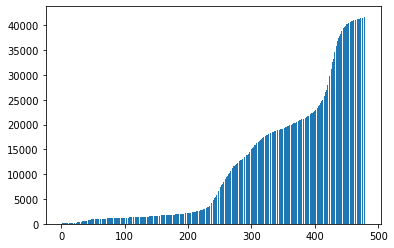

In [86]:
x = [i for i in range(len(positives))]
# x = list(datetimes)
y = list(positives)
plt.bar(x, y)

### 県庁の位置リスト作成

In [87]:
json_open = open("../data/pref.json")
pref_json = json.load(json_open)
pref_latlon = {}

In [88]:
for i, pref in enumerate(pref_json["marker"]):
    en_pref_ = pref["url"].split(".")[2]
    en_pref = en_pref_[0].upper() + en_pref_[1:]
#     print(en_pref)
#     pref_json["marker"][i]["pref_en"] = en_pref
#     pref_latlon.append({"pref": en_pref, "lat": pref["lat"], "lon": pref["lng"]})
    pref_latlon[en_pref] = [pref["lat"], pref["lng"], i]

In [89]:
pref_latlon

{'Hokkaido': [43.064301, 141.346874, 0],
 'Aomori': [40.824622, 140.740598, 1],
 'Iwate': [39.7036, 141.152709, 2],
 'Miyagi': [38.268812, 140.872082, 3],
 'Akita': [39.718611, 140.102401, 4],
 'Yamagata': [38.240422, 140.363592, 5],
 'Fukushima': [37.750301, 140.467522, 6],
 'Ibaraki': [36.341793, 140.446802, 7],
 'Tochigi': [36.566672, 139.883093, 8],
 'Gunma': [36.390698, 139.060451, 9],
 'Saitama': [35.857431, 139.648901, 10],
 'Chiba': [35.605045, 140.123325, 11],
 'Tokyo': [35.689753, 139.691731, 12],
 'Kanagawa': [35.447495, 139.6424, 13],
 'Niigata': [37.902419, 139.023225, 14],
 'Toyama': [36.695275, 137.211342, 15],
 'Ishikawa': [36.59473, 136.625582, 16],
 'Fukui': [36.065219, 136.221682, 17],
 'Yamanashi': [35.664161, 138.568459, 18],
 'Nagano': [36.651296, 138.181239, 19],
 'Gifu': [35.391228, 136.722311, 20],
 'Shizuoka': [34.976944, 138.383009, 21],
 'Aichi': [35.180344, 136.906632, 22],
 'Mie': [34.730272, 136.508598, 23],
 'Shiga': [35.004528, 135.868607, 24],
 'Kyoto'

### Harmoware-visで可視化

In [104]:
dates = df["Date"]
prefectures = df["Prefecture"]
positives = df["Positive"]
testeds = df["Tested"]
dischs = df["Discharged"]
fatals = df["Fatal"]

new_positives = []#新規感染者数
for i in range(len(positives)):
    if i//47 == 0:
        new_positives.append(positives[i])
        continue
    new_positives.append(positives[i] - positives[i-47])

In [102]:
#全データ表示
values = []
for p, t, d, f in zip(positives, testeds, dischs, fatals):
    values.append([p,t,d,f])

In [109]:
#特定のデータのみ
values = []
for v in new_positives:
    values.append([v])

In [110]:
def date_to_timestamp(date):
    l = list(map(int, date.split("-")))
    return datetime.datetime(l[0], l[1], l[2], 0,0,0).timestamp()

def date_to_dt(date):
    l = list(map(int, date.split("-")))
    return datetime.datetime(l[0], l[1], l[2], 0,0,0)

#### 棒グラフ

In [111]:
#add bar(initialize)
start_ts = date_to_dt(dates[0])
bars = sx.BGStore()
for pref in pref_latlon:
    lat = pref_latlon[pref][0]
    lon = pref_latlon[pref][1]
    pref_id = pref_latlon[pref][2]
    bars.addBarData(ts = start_ts, label = pref, lat = lat, lon = lon, barData = [0])
await sx.sendBarGraphsAx(bars)

Response(ok=False, err='')

In [112]:
#update bar
before_ts = start_ts
dt = start_ts
day_values = []
for date, prefecture, value in zip(dates, prefectures, values):
    ts = date_to_dt(date)
    day_values += value
    if ts != before_ts:
        before_ts = ts
        day_values = []
        dt += datetime.timedelta(seconds = 1)
        await sx.sendBarGraphsAx(bars)
        
    bars.updateBarData(pref_latlon[prefecture][2], before_ts, pref_latlon[prefecture][0], pref_latlon[prefecture][1], value)